In [15]:
import datetime

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline                          
sns.set(color_codes=True)
import os

csv_file_path = os.path.join(os.getcwd(), 'data_csv_file.csv')

df = pd.read_csv(csv_file_path)
df['Exchange Date'] = pd.to_datetime(df['Exchange Date'], errors='coerce') # Transforming data in timestamps.
df = df.dropna(subset=['Exchange Date'])

df = df.drop_duplicates(keep='last')
columns = ["Exchange Date", "Close", "Net", "%Chg", "Open", "Low", "High"]
duplicate_rows = df[df.duplicated(subset=columns[1:], keep=False)]
df.drop(index=340, inplace=True)

df['Exchange Date'] = pd.to_datetime(df['Exchange Date'])

rows_with_weekend_dates = df[(df['Exchange Date'].dt.dayofweek == 6) | (df['Exchange Date'].dt.dayofweek == 5)]
    
df = df.drop([601, 862, 863])

# print(df[df['Exchange Date'] == '2024-04-12']) -> row 5
def insert_row(idx, df, df_insert):
    df_insert['Exchange Date'] = pd.to_datetime(df_insert['Exchange Date'])

    dfA = df.iloc[:idx, ]
    dfB = df.iloc[idx:, ]

    df = pd.concat([dfA, df_insert, dfB]).reset_index(drop=True)

    return df

new_row = pd.DataFrame({'Exchange Date': ['2024-04-15'], 'Open': [1104.45], 'High': [1104.45], 'Low': [1091.27], 'Close': [1091.78], 'Net': [-11.83], '%Chg': [-1.071937]})
df = insert_row(5, df, new_row)
new_row = pd.DataFrame({'Exchange Date': ['2024-03-15'], 'Open': [1097.95], 'High': [1097.95], 'Low': [1091.02], 'Close': [1092.73], 'Net': [-12.73], '%Chg': [-1.15155682]})
df = insert_row(26, df, new_row)
new_row = pd.DataFrame({'Exchange Date': ['2024-02-15'], 'Open': [1054.09], 'High': [1060.84], 'Low': [1054.09], 'Close': [1059.81], 'Net': [13.06], '%Chg': [1.24767136]})
df = insert_row(47, df, new_row)
outliers_2021 = ["2021-02-22", "2021-02-23", "2021-02-24", "2021-03-15", "2021-03-25", "2021-05-18"]
values = pd.to_datetime(outliers_2021)

filtered_df = df[df['Exchange Date'].isin(values)]
filtered_df
out_of_range = [825, 824, 823, 810]

with pd.option_context("mode.copy_on_write", True):
    for row_index in out_of_range:
        if row_index < len(df) - 1:
            next_close = df.loc[row_index + 1, 'Close']
            current_net = round(df.loc[row_index, 'Net'], 2)

            df.loc[row_index, 'Close'] = next_close + current_net
changed_rows = df[df.index.isin(out_of_range)]

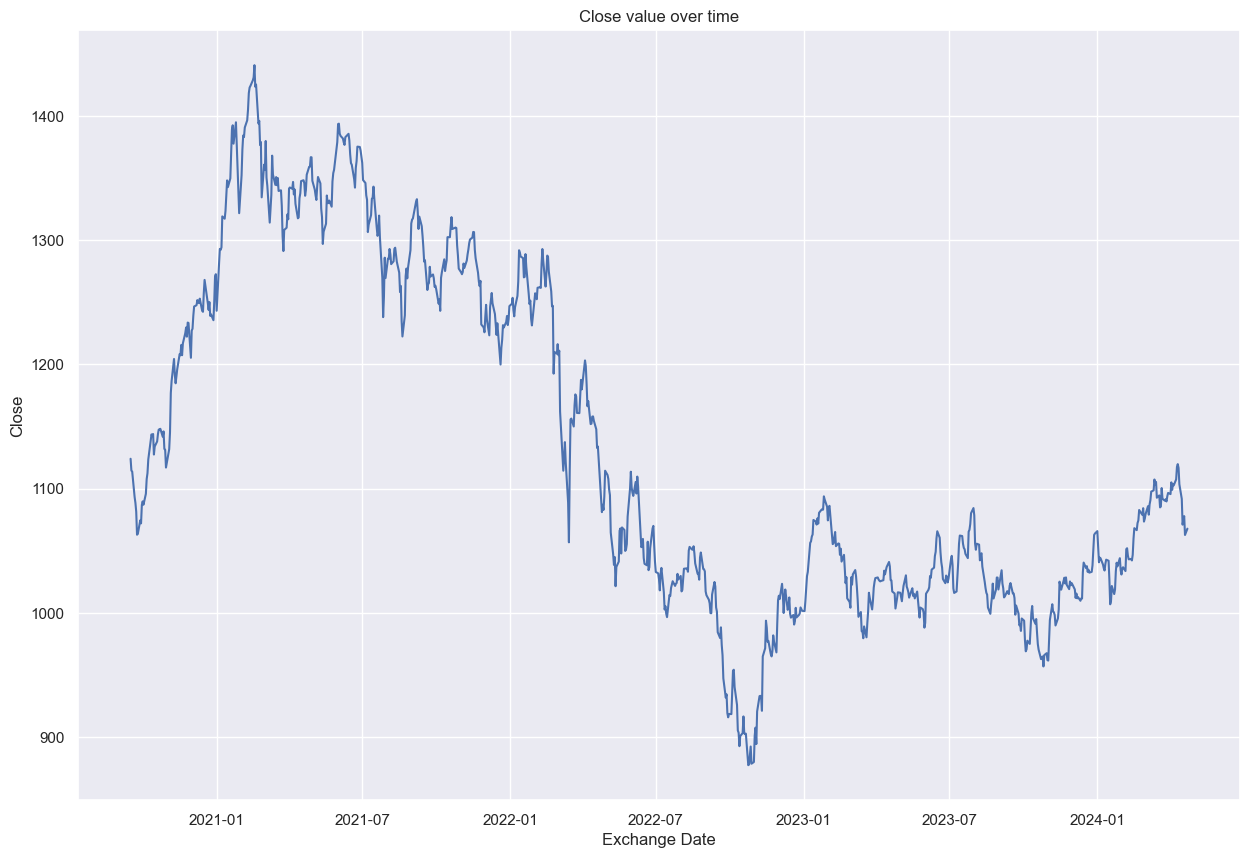

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(df['Exchange Date'], df['Close'])
plt.xlabel('Exchange Date')
plt.ylabel('Close')
plt.title('Close value over time')
plt.show()

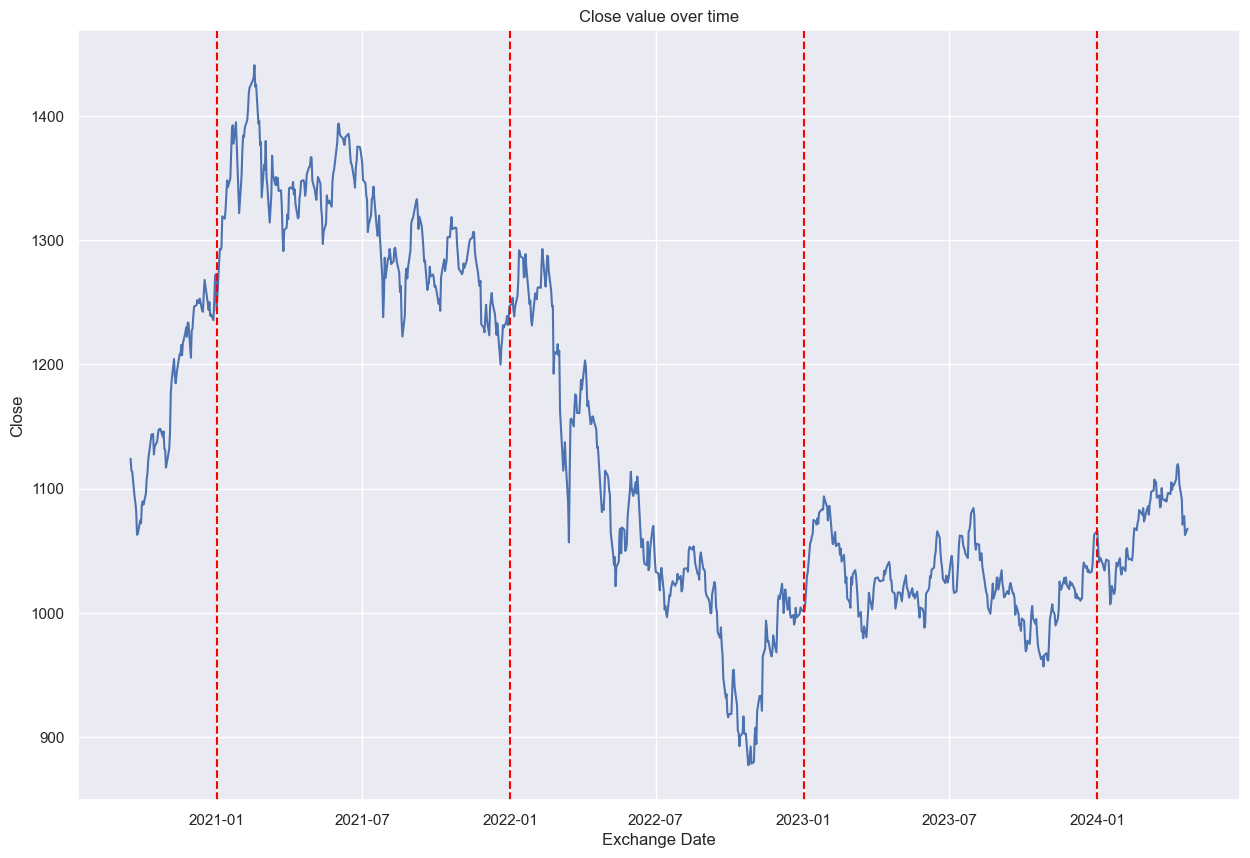

In [25]:
import datetime

plt.figure(figsize=(15, 10))
plt.plot(df['Exchange Date'], df['Close'])
plt.xlabel('Exchange Date')
plt.ylabel('Close')
plt.title('Close value over time')

xcoords = [datetime.datetime(2021, 1, 1), datetime.datetime(2022, 1, 1), datetime.datetime(2023, 1, 1), datetime.datetime(2024, 1, 1)]
for xc in xcoords:
    plt.axvline(x=xc, color='red', linestyle='--')

plt.show()

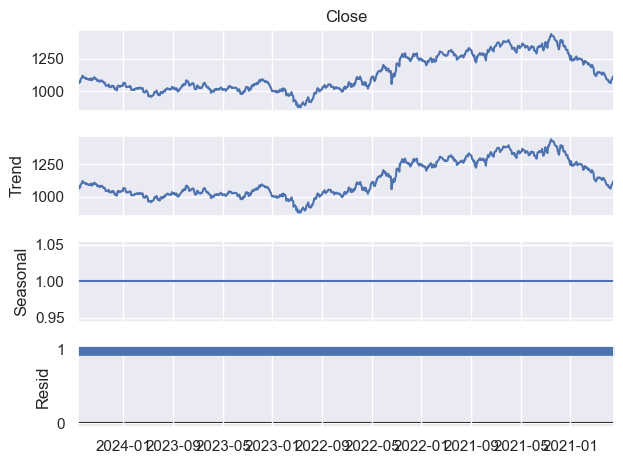

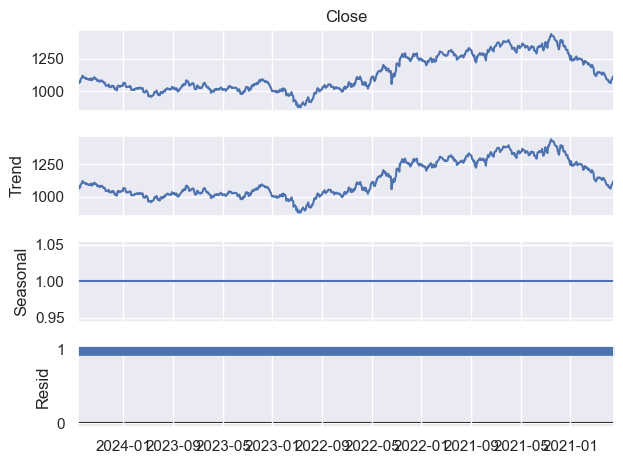

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

# df.set_index('Exchange Date', inplace=True)
analysis = df['Close'].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=1)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()